In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Weighted median

In the video we have discussed that for MAPE metric the best constant prediction is [weighted median](https://en.wikipedia.org/wiki/Weighted_median) with weights

$$w_i = \frac{\sum_{j=1}^N \frac{1}{x_j}}{x_i}$$

for each object $x_i$.

This notebook exlpains how to compute weighted median. Let's generate some data first, and then find it's weighted median.

In [2]:
N = 5
x = np.random.randint(low=1, high=100, size=N)
x

array([37, 52, 21, 25, 46])

1) Compute *normalized* weights:

In [3]:
inv_x = 1.0/x
inv_x

array([ 0.02702703,  0.01923077,  0.04761905,  0.04      ,  0.02173913])

In [4]:
w = inv_x/sum(inv_x)
w

array([ 0.17367772,  0.12357838,  0.3060036 ,  0.25704302,  0.13969729])

2) Now sort the normalized weights. We will use `argsort` (and not just `sort`) since we will need indices later.

In [5]:
idxs = np.argsort(w)
sorted_w = w[idxs]
sorted_w

array([ 0.12357838,  0.13969729,  0.17367772,  0.25704302,  0.3060036 ])

3) Compute [cumulitive sum](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.cumsum.html) of sorted weights

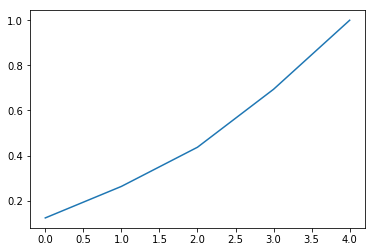

sorted_w_cumsum:  [ 0.12357838  0.26327567  0.43695338  0.6939964   1.        ]


In [6]:
sorted_w_cumsum = np.cumsum(sorted_w)
plt.plot(sorted_w_cumsum); plt.show()
print ('sorted_w_cumsum: ', sorted_w_cumsum)

4) Now find the index when cumsum hits 0.5:

In [7]:
idx = np.where(sorted_w_cumsum>0.5)[0][0]
idx

3

5) Finally, your answer is sample at that position:

In [8]:
pos = idxs[idx]
x[pos]

25

In [9]:
print('Data: ', x)
print('Sorted data: ', np.sort(x))
print('Weighted median: %d, Median: %d' %(x[pos], np.median(x)))

Data:  [37 52 21 25 46]
Sorted data:  [21 25 37 46 52]
Weighted median: 25, Median: 37


Thats it! 

If the procedure looks surprising for you, try to do steps 2--5 assuming the weights are $w_i=\frac{1}{N}$. That way you will find a simple median (not weighted) of the data. 